<a href="https://colab.research.google.com/github/Shipra-Kumar/Shipra-Kumar/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement 1:**

In [1]:
!pip install seaborn pyarrow


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

# Uploading the file
uploaded = files.upload()
import os
print("Uploaded Files:", os.listdir('/content'))


Saving Walmart.csv to Walmart.csv
Uploaded Files: ['.config', 'Capstone Dataset.txt', 'Capstone-Dataset.zip', 'Walmart.csv', 'sample_data']


In [9]:
import os

# Listing files in the current directory
print("Files in current directory:", os.listdir('/content'))




Files in current directory: ['.config', 'Capstone Dataset.txt', 'Capstone-Dataset.zip', 'Walmart.csv', 'sample_data']


In [10]:

file_name = 'Walmart.csv'
walmart_df = pd.read_csv(file_name)

# Displaying dataset information
print("Dataset Information:")
print(walmart_df.info())
print("\nFirst Five Rows:")
print(walmart_df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

First Five Rows:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0

In [12]:
# Renaming columns (lowercase and replacing spaces with underscores)
walmart_df.columns = walmart_df.columns.str.lower()  # Convert column names to lowercase
walmart_df.columns = walmart_df.columns.str.replace(' ', '_')  # Replace spaces with underscores

# Displaying the updated columns and the first 5 rows
print("Updated Column Names:")
print(walmart_df.columns)
print("\nFirst 5 Rows:")
print(walmart_df.head(5))


Updated Column Names:
Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

First 5 Rows:
   store        date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          cpi  unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [14]:
# Converting the 'date' column to datetime format with the correct format
walmart_df['date'] = pd.to_datetime(walmart_df['date'], dayfirst=True)

# Checking for missing values in the dataset
print("\nMissing Values:")
print(walmart_df.isnull().sum())

# Handling missing values
walmart_df = walmart_df.dropna()  # Drop rows with missing values

# Adding features for time-based analysis
walmart_df['year'] = walmart_df['date'].dt.year  # Extract year
walmart_df['month'] = walmart_df['date'].dt.month  # Extract month
walmart_df['week'] = walmart_df['date'].dt.isocalendar().week  # Extract ISO week number

# Displaying the processed dataset
print("\nProcessed Data:")
print(walmart_df.head())




Missing Values:
store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

Processed Data:
   store       date  weekly_sales  holiday_flag  temperature  fuel_price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          cpi  unemployment  year  month  week  
0  211.096358         8.106  2010      2     5  
1  211.242170         8.106  2010      2     6  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      3     9  


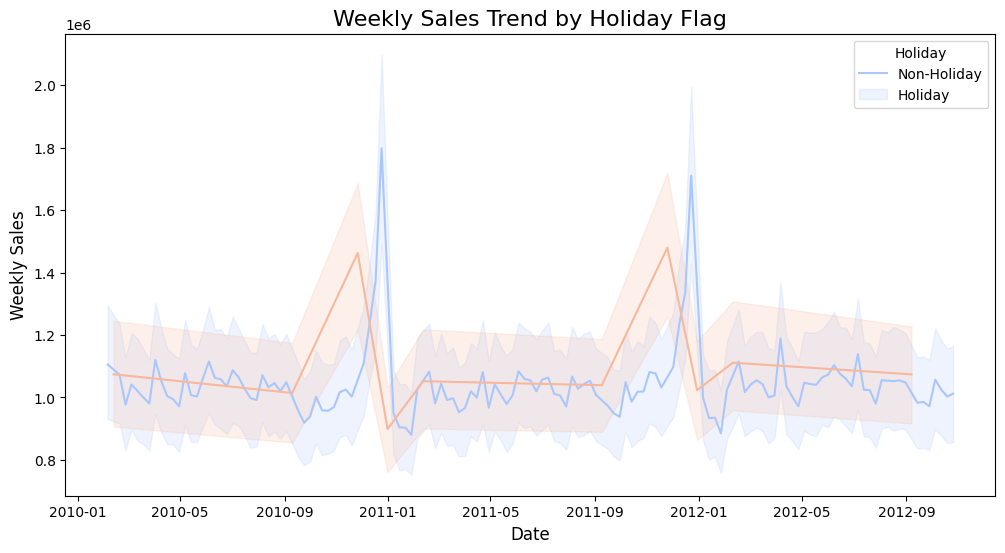

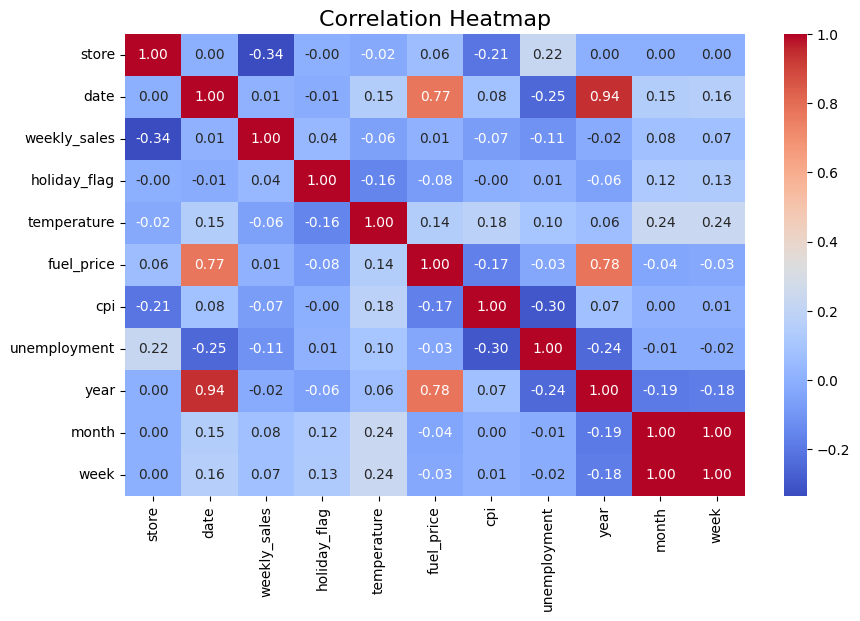


Store-wise Total Sales:
store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: weekly_sales, dtype: float64


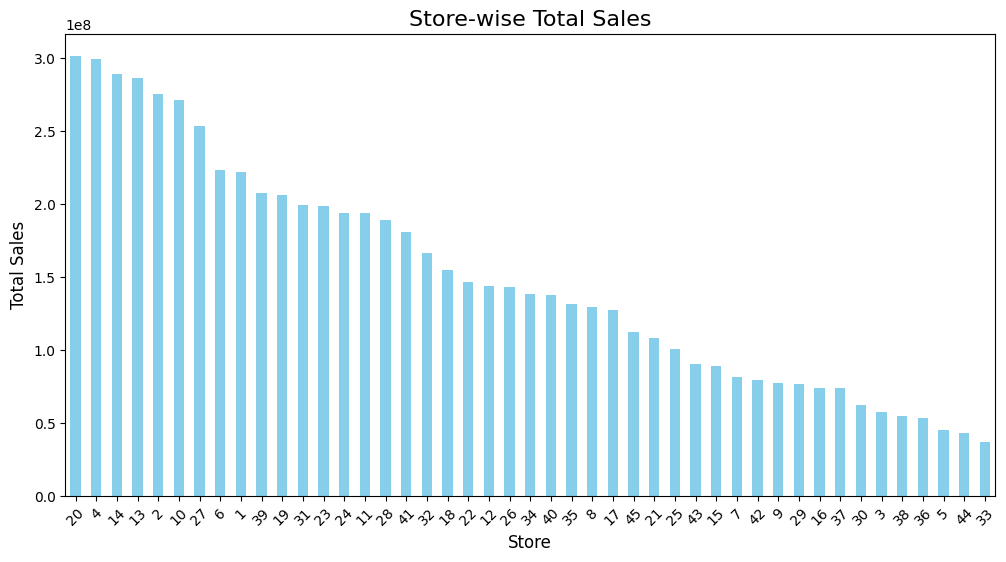

In [16]:


# Weekly Sales Trend by Holiday Flag
plt.figure(figsize=(12, 6))
sns.lineplot(data=walmart_df, x='date', y='weekly_sales', hue='holiday_flag', palette='coolwarm')
plt.title("Weekly Sales Trend by Holiday Flag", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.legend(title="Holiday", labels=["Non-Holiday", "Holiday"], fontsize=10)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(walmart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Store-wise Total Sales
store_sales = walmart_df.groupby('store')['weekly_sales'].sum().sort_values(ascending=False)
print("\nStore-wise Total Sales:")
print(store_sales)

# Bar Plot for Store-wise Total Sales
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='skyblue')
plt.title("Store-wise Total Sales", fontsize=16)
plt.xlabel("Store", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_g4usla4/21xj2jzg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_g4usla4/lfceitb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52479', 'data', 'file=/tmp/tmp_g4usla4/21xj2jzg.json', 'init=/tmp/tmp_g4usla4/lfceitb1.json', 'output', 'file=/tmp/tmp_g4usla4/prophet_modelj0hwch9v/prophet_model-20250113053003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


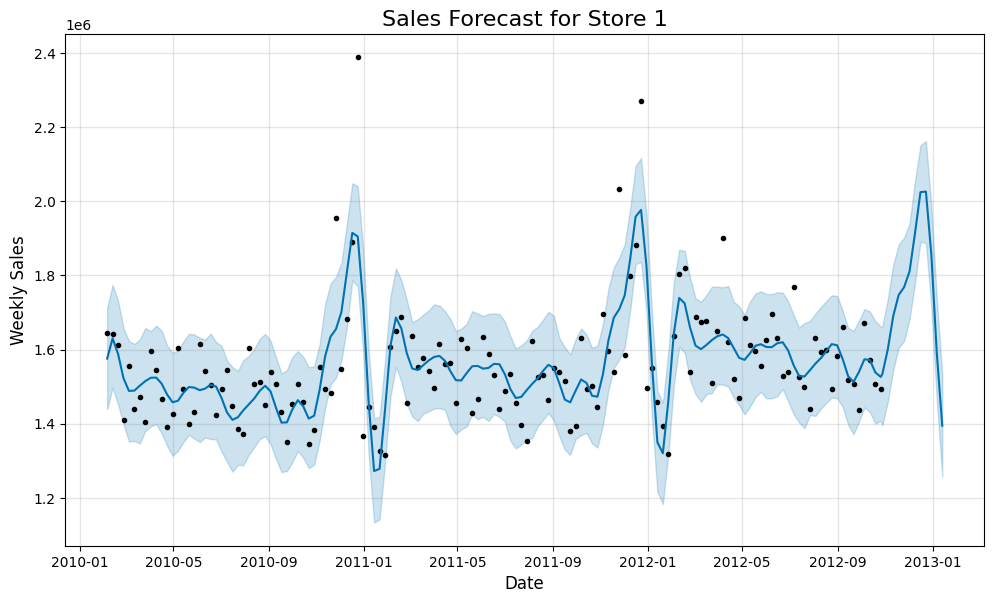

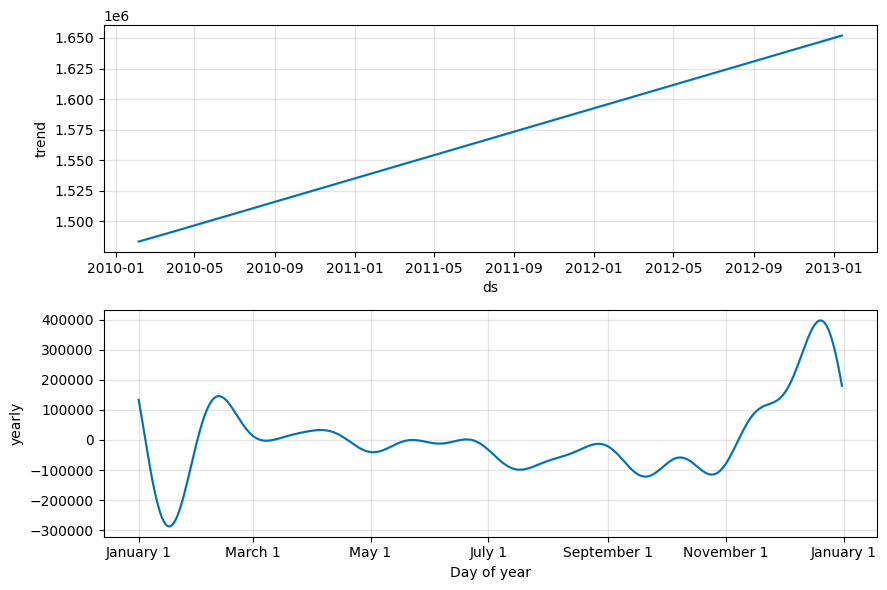

In [17]:
from prophet import Prophet

# Filtering data for Store 1 and preparing for Prophet
store_1_data = walmart_df[walmart_df['store'] == 1][['date', 'weekly_sales']]
store_1_data = store_1_data.rename(columns={'date': 'ds', 'weekly_sales': 'y'})  # Rename for Prophet

# Initializing and fitting the Prophet model
model = Prophet()
model.fit(store_1_data)

# Creating a future dataframe for the next 12 weeks
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)
plt.title("Sales Forecast for Store 1", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.show()

# Plotting components of the forecast
fig2 = model.plot_components(forecast)
plt.show()


In [18]:
import joblib

# Saving the model for future use
joblib.dump(model, "store_1_forecast_model.pkl")


['store_1_forecast_model.pkl']

**Problem Statement 2:**

In [26]:
# Importing necessary libraries
import pandas as pd
from google.colab import files

# Uploading the dataset
print("Please upload the dataset.")
uploaded = files.upload()

# Loading the dataset
file_name = list(uploaded.keys())[0]
online_retail_df = pd.read_csv(file_name , encoding='ISO-8859-1')

# Previewing the dataset
print("\nDataset Info:")
print(online_retail_df.info())
print("\nFirst Five Rows:")
print(online_retail_df.head())




Please upload the dataset.


Saving online_retail.csv to online_retail (1).csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

First Five Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G

In [29]:
# Cleaning column names
online_retail_df.columns = online_retail_df.columns.str.lower().str.replace(' ', '_')

# Dropping rows with missing customer ID or description
online_retail_df = online_retail_df.dropna(subset=['customerid', 'description'])

# Creating a 'total_sales' column
online_retail_df['total_sales'] = online_retail_df['quantity'] * online_retail_df['unitprice']

# Converting 'invoice_date' to datetime
online_retail_df['invoicedate'] = pd.to_datetime(online_retail_df['invoicedate'])

# Previewing processed data
print("\nProcessed Data Preview:")
print(online_retail_df.head())



Processed Data Preview:
  invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  total_sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  


In [32]:
# Defining the reference date as the last date in the dataset
reference_date = online_retail_df['invoicedate'].max()

# Grouping by 'customerid' and calculating RFM metrics
rfm = online_retail_df.groupby('customerid').agg({
    'invoicedate': lambda x: (reference_date - x.max()).days,  # Recency
    'invoiceno': 'nunique',  # Frequency (number of unique invoices)
    'total_sales': 'sum'  # Monetary (total sales)
}).rename(columns={'invoicedate': 'recency', 'invoiceno': 'frequency', 'total_sales': 'monetary'})

# Convert 'recency' to integer
rfm['recency'] = rfm['recency'].astype(int)

# Preview RFM metrics
print("\nRFM Metrics:")
print(rfm.head())



RFM Metrics:
            recency  frequency  monetary
customerid                              
12346.0         325          2      0.00
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40



RFM with Clusters:
            recency  frequency  monetary  cluster
customerid                                       
12346.0         325          2      0.00        1
12347.0           1          7   4310.00        3
12348.0          74          4   1797.24        3
12349.0          18          1   1757.55        3
12350.0         309          1    334.40        1


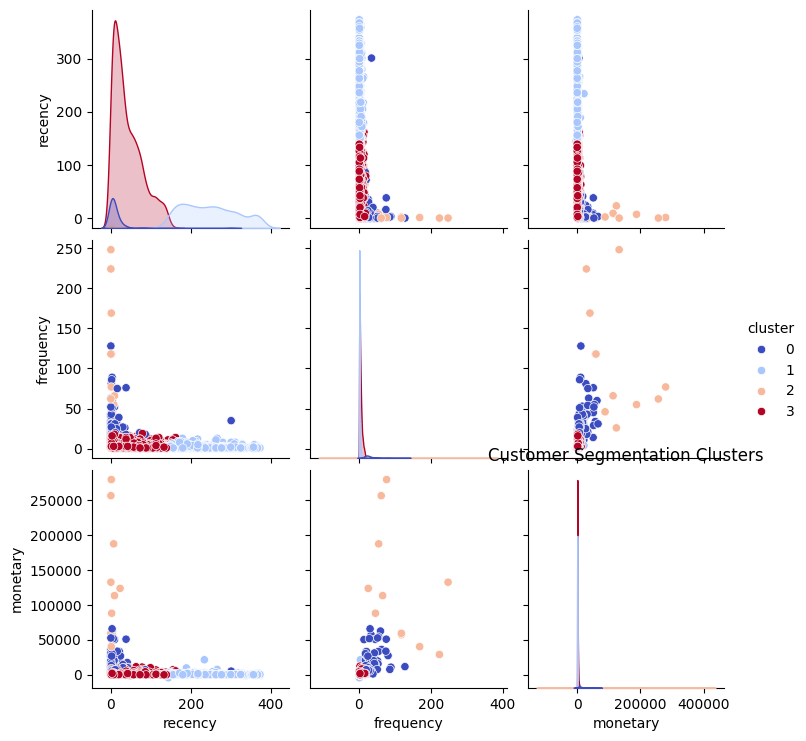

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Normalizing the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Previewing RFM data with clusters
print("\nRFM with Clusters:")
print(rfm.head())

# Visualizing clusters
sns.pairplot(rfm, vars=['recency', 'frequency', 'monetary'], hue='cluster', palette='coolwarm', diag_kind='kde')
plt.title("Customer Segmentation Clusters")
plt.show()
